# House Prices: Advanced Regression Techniques

Nem sempre quem vai comprar uma casa está pensando no tamanho do porão ou quão perto está de uma rodovia mas essa competição mostra que há diversos fatores que afetam o preço de uma casa.

O [Kaggle](https://www.kaggle.com) traz o desafio de prever o preço de uma casa de acordo com vários atributos, o desafio é perfeito para treinar a regressão linear e feature engineering, todas as informações podem ser encontradas [aqui](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Este dataset tem um número grande de atributos (79 ao todo), a descrição de cada um, você encontra [aqui](https://github.com/leovilani/projects/blob/master/house-price-advantage/data/data_description.txt): 

Meus objetivos nesse notebook são:

- Análise exploratória (EDA);
- Preparar os dados (limpeza de dados e preencher valores faltantes);
- Feature Engineering (quando se extrai novos atributos com os existentes);
- Preparar os dados para o modelo de machine learning;
- Treinar os modelos para a predição;
- Validação;

## Importando bibliotecas

In [1]:
#Básicas
import pandas as pd
import numpy as np

#Para visualização de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Para normalização dos dados
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Modelos de regressão
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Validação
from sklearn.model_selection import KFold, GridSearchCV

In [2]:
#Para conseguir ver mais colunas do dataset
pd.set_option('display.max_columns', 200)

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Aqui os atributos do dataset, são 79 com diferentes características que podem infuenciar no valor de uma casa.

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Colocando os dados de treino e teste juntos para facilitar.
train_test = pd.concat([train, test], keys=[1, 2], axis=0)
train_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
  1        2          20       RL         80.0     9600   Pave   NaN      Reg   
  2        3          60       RL         68.0    11250   Pave   NaN      IR1   
  3        4          70       RL         60.0     9550   Pave   NaN      IR1   
  4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
2 1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
  1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
  1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
  1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
  1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

       LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1 0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
  2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
  4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...            ...       ...       ...       ...          ...        ...   
2 1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

       Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1 0          Norm     1Fam     2Story            7            5       2003   
  1          Norm     1Fam     1Story            6            8       1976   
  2          Norm     1Fam     2Story            7            5       2001   
  3          Norm     1Fam     2Story            7            5       1915   
  4          Norm     1Fam     2Story            8            5       2000   
...           ...      ...        ...          ...          ...        ...   
2 1454       Norm    Twnhs     2Story            4            7       1970   
  1455       Norm   TwnhsE     2Story            4            5       1970   
  1456       Norm     1Fam     1Story            5            7       1960   
  1457       Norm     1Fam     SFoyer            5            5       1992   
  1458       Norm     1Fam     2Story            7            5       1993   

        YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1 0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  1             1976     Gable  CompShg     MetalSd     MetalSd       None   
  2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
  4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...              ...       ...      ...         ...         ...        ...   
2 1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
  1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
  1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

        MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1 0          196.0        Gd        TA      PConc       Gd       TA   
  1            0.0        TA        TA     CBlock       Gd       TA   
  2          162.0        Gd        T

## Análise exploratória

Informações sobre os atributos, todos estão no tipo certo, e apesar de aparentar muitos valores faltantes a verdade é que após ler a descrição dos atributos, se percebe que os NaNs querem dizer que a casa não tem a característica.

In [6]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (1, 0) to (2, 1458)
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18

Mas ainda sim se tem que preencher esses valores faltantes, será 0 para os atributos numericos e 'nothing' para os categóricos.

In [7]:
numerico = train_test.select_dtypes(['int', 'float', 'int64', 'float64'])
numerico = numerico.fillna(0)

for col in numerico:
    train_test[col] = numerico[col]

In [8]:
categorico = train_test.select_dtypes('object')
categorico = categorico.fillna('Nothing')

for col in categorico:
    train_test[col] = categorico[col]

In [9]:
train_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,57.766701,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1870.364166,1.766016,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,90491.588215
std,842.787043,42.517628,33.481636,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,449.686321,0.762196,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,106496.379333
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,730.500000,20.000000,43.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,1460.000000,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,34900.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Gráfico de correlação dos atributos numericos.

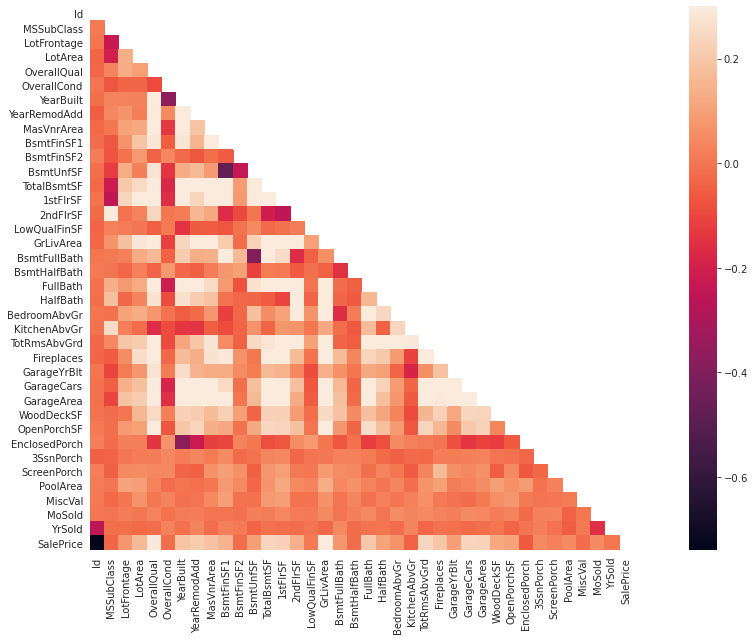

In [10]:
corr = numerico.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

As maiores correlações positivas, tamanho da área da casa (GrLivArea), qualidade geral da casa (OverallQual) e tamanho da garagem (GarageCars e GarageArea) quanto maior esses atributos, maior o valor da casa.

In [11]:
corr['SalePrice'].sort_values(ascending=False)[:10]

SalePrice       1.000000
GrLivArea       0.299150
OverallQual     0.295558
TotRmsAbvGrd    0.242075
TotalBsmtSF     0.239187
GarageCars      0.235433
GarageArea      0.231717
1stFlrSF        0.229243
YearRemodAdd    0.211347
FullBath        0.203831
Name: SalePrice, dtype: float64

In [12]:
#Separando os datasets de treino e teste para fazer alguns gráficos
train, test = train_test.xs(1), train_test.xs(2)

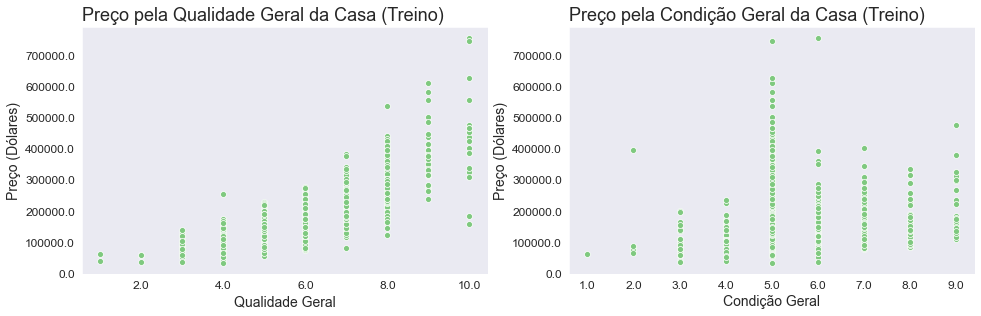

In [13]:
sns.set_palette('Accent')
sns.set_style('dark')

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
ax = sns.scatterplot(x=train['OverallQual'], y=train['SalePrice'])

plt.title('Preço pela Qualidade Geral da Casa (Treino)', fontsize=18, loc='Left')
ax.set_xlabel('Qualidade Geral', fontsize=14)
ax.set_ylabel('Preço (Dólares)', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)

plt.subplot(2, 2, 2)
ax = sns.scatterplot(x=train['OverallCond'], y=train['SalePrice'])

plt.title('Preço pela Condição Geral da Casa (Treino)', fontsize=18, loc='Left')
ax.set_xlabel('Condição Geral', fontsize=14)
ax.set_ylabel('Preço (Dólares)', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax=ax

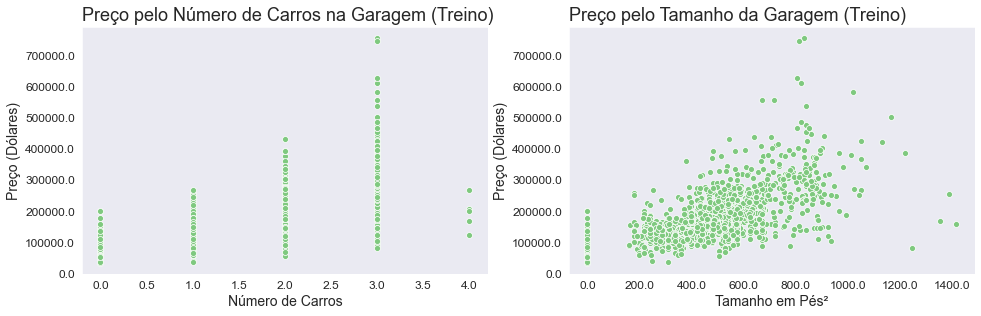

In [14]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
ax = sns.scatterplot(x=train['GarageCars'], y=train['SalePrice'])

plt.title('Preço pelo Número de Carros na Garagem (Treino)', fontsize=18, loc='Left')
ax.set_xlabel('Número de Carros', fontsize=14)
ax.set_ylabel('Preço (Dólares)', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)

plt.subplot(2, 2, 2)
ax = sns.scatterplot(x=train['GarageArea'], y=train['SalePrice'])

plt.title('Preço pelo Tamanho da Garagem (Treino)', fontsize=18, loc='Left')
ax.set_xlabel('Tamanho em Pés²', fontsize=14)
ax.set_ylabel('Preço (Dólares)', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax=ax

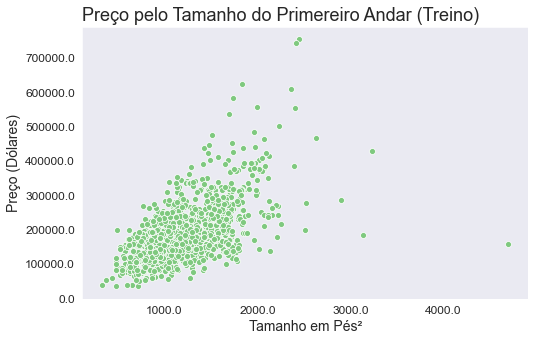

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=train['1stFlrSF'], y=train['SalePrice'])

plt.title('Preço pelo Tamanho do Primereiro Andar (Treino)', fontsize=18, loc='Left')
ax.set_xlabel('Tamanho em Pés²', fontsize=14)
ax.set_ylabel('Preço (Dólares)', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax=ax

## Feature Engineering

Alguns desses atributos foram usados por mim para fazer feature engineering:
- OverallQualCond, com a soma da Qualidade e Condição geral da casa fiz uma nota;
- AgeBuilt, com o ano de construção da casa fiz a idade dela;
- Remolded, o dataset tem o ano em que um prédio foi reformado, aqueles que não foram simplismente tem o ano em que foi construido, assim consegui um atributo onde mostra se o prédio foi ou não reformado;
- AllFlrSF, misturando o tamanho do primeiro e segundo andar.

In [16]:
train_test['OverallQualCond'] = (train_test['OverallQual'] + train_test['OverallCond']) / 2

train_test['AgeBuilt'] = 2020 - train_test['YearBuilt']

train_test['Remolded'] = np.where(train_test['YearRemodAdd'] > train_test['YearBuilt'], 1, 0)

train_test['AllFlrSF'] = train_test['1stFlrSF'] + train_test['2ndFlrSF']

## Preparando os dados

In [17]:
train_test = pd.get_dummies(train_test)
train, test = train_test.xs(1), train_test.xs(2)

train.to_csv('data/train_clean.csv')
test = test.drop('SalePrice', axis=1)
test.to_csv('data/test_clean.csv')

In [18]:
X_train = train.drop(['SalePrice', 'Id'], axis=1)
y_train = train['SalePrice']
X_test = test.drop('Id', axis=1)

Aqui irei normalizar os dados também e fazer um teste com eles.

In [19]:
scaler = StandardScaler()
Scaler_train = scaler.fit_transform(X_train)
Scaler_test = scaler.fit_transform(X_test)

## Modelos

Usarei o RandomForestRegressor e o XGBoostRegressor, usarei também o GridSearchCV para escolher o melhor modelo de acordo com as opções de parâmetros que coloquei, além do KFold para fazer a validação cruzada.

### Random Forest

In [20]:
np.random.seed(123)

parametros = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 7, 10],
    'min_samples_split': [2, 7, 15],
    'min_samples_leaf': [3, 5, 10],
    'max_features': ['auto', 0.5]
}

busca_rf = GridSearchCV(RandomForestRegressor(), parametros, scoring='neg_mean_squared_log_error',
                        cv=KFold(n_splits=5), verbose=1, n_jobs=-1)
busca_rf.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  5.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n...ne,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=Fal

A métrica usada segundo a competição é Raiz do Erro Quadrático Médio (RMSE), mas na tabela de classificação usa o "log" desse número, então quanto mais perto do 0 melhor e é o que usei para avaliar os modelos.

In [21]:
busca_rf.best_score_

-0.019984809357370747

### Random Forest (Com StandardSacaler)

In [22]:
np.random.seed(123)

parametros = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 7, 10],
    'min_samples_split': [2, 7, 15],
    'min_samples_leaf': [3, 5, 10],
    'max_features': ['auto', 0.5]
}

busca_rf_scaler = GridSearchCV(RandomForestRegressor(), parametros, scoring='neg_mean_squared_log_error',
                               cv=KFold(n_splits=5), verbose=1, n_jobs=-1)
busca_rf_scaler.fit(Scaler_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  5.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n...ne,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=Fal

In [23]:
busca_rf_scaler.best_score_

-0.019959202584662612

### XGBRegressor

In [24]:
np.random.seed(123)

parametros = {
    'eta': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 1],
    'n_estimators': [100, 200, 500]
}

busca_xgb = GridSearchCV(XGBRegressor(), parametros, scoring='neg_mean_squared_log_error', cv=KFold(n_splits=5),
                         verbose=1, n_jobs=-1)
busca_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=Non...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.01, 0.05, 0.1, 0.3], 'max_depth': [3, 6, 9],
     

In [25]:
busca_xgb.best_score_

-0.01569676442533709

### XGBRegressor (Com StandardScaler)

In [26]:
np.random.seed(123)

parametros = {
    'eta': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'subsample': [0.5, 1],
    'n_estimators': [100, 200, 500]
}

busca_xgb_scaler = GridSearchCV(XGBRegressor(), parametros, scoring='neg_mean_squared_log_error', cv=KFold(n_splits=5),
                                verbose=1, n_jobs=-1)
busca_xgb_scaler.fit(Scaler_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=Non...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': [0.01, 0.05, 0.1, 0.3], 'max_depth': [3, 6, 9],
     

In [27]:
busca_xgb_scaler.best_score_

-0.015696556918789087

## Resultados

Extraindo os resultados para enviar ao Kaggle.

In [29]:
submission = pd.DataFrame()
submission['Id'] = test['Id']

melhor_rf = busca_rf.best_estimator_
submission['SalePrice'] = melhor_rf.predict(X_test)

submission.to_csv('submission_randomforest_v1.csv', index=False)

In [30]:
melhor_rf_scaler = busca_rf_scaler.best_estimator_
submission['SalePrice'] = melhor_rf_scaler.predict(X_test)

submission.to_csv('submission_randomforest_scaler_v1.csv', index=False)

In [31]:
melhor_xgb = busca_xgb.best_estimator_
submission['SalePrice'] = melhor_xgb.predict(X_test)

submission.to_csv('submission_xgboost_v1.csv', index=False)

Percebi que os modelos com StandardScaler não funcionam bem na competição.